# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#Declare variables for storing data in series'
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

#counter
n = 0

#api URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#loop for cycling through cities
for entry in cities:

#counter
    n += 1
    
#Build query URL
    query_url = url + "appid=" + api_key + "&q=" + entry

#Do the query
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#Console messages and data collection    
    if weather_json['cod'] == "404":
        print(f"City number {n}, {entry}, is not available")
    else:
        city.append(entry)
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        print(f"City number {n} is: {entry}")

#Requests are capped at 60 per minute. Wait one second per request
    time.sleep(1)
    

City number 1 is: popondetta
City number 2 is: butaritari
City number 3 is: vila franca do campo
City number 4 is: punta arenas
City number 5 is: avarua
City number 6 is: tuktoyaktuk
City number 7 is: cape town
City number 8 is: las cruces
City number 9 is: kodiak
City number 10 is: geraldton
City number 11 is: rocha
City number 12 is: lavrentiya
City number 13 is: junagarh
City number 14 is: nizip
City number 15 is: am timan
City number 16 is: arraial do cabo
City number 17 is: esperance
City number 18 is: barrow
City number 19 is: albany
City number 20 is: mataura
City number 21 is: rikitea
City number 22, taolanaro, is not available
City number 23 is: bluff
City number 24 is: jamestown
City number 25 is: broome
City number 26, samusu, is not available
City number 27 is: faanui
City number 28 is: ushuaia
City number 29 is: narsaq
City number 30 is: grindavik
City number 31 is: torbay
City number 32 is: kirchhain
City number 33 is: alofi
City number 34, attawapiskat, is not available


City number 267 is: shar
City number 268 is: uray
City number 269 is: goundam
City number 270, artyk, is not available
City number 271 is: coquimbo
City number 272 is: saint-augustin
City number 273 is: axim
City number 274 is: longyearbyen
City number 275 is: shelburne
City number 276 is: cairo
City number 277 is: harrismith
City number 278 is: mount gambier
City number 279 is: san luis
City number 280, sataua, is not available
City number 281 is: lincoln
City number 282 is: esmeralda
City number 283 is: gorele
City number 284 is: danielskuil
City number 285 is: gizo
City number 286 is: nemuro
City number 287 is: kropotkin
City number 288 is: tiverton
City number 289 is: oromocto
City number 290 is: tautira
City number 291 is: victor harbor
City number 292 is: warkworth
City number 293, raga, is not available
City number 294 is: oranjemund
City number 295 is: yarada
City number 296 is: stykkisholmur
City number 297 is: salalah
City number 298 is: mayo
City number 299 is: rio pomba
Cit

City number 537 is: tyukalinsk
City number 538, olafsvik, is not available
City number 539 is: roebourne
City number 540 is: nanchong
City number 541 is: tashkent
City number 542 is: berezanka
City number 543 is: sedro-woolley
City number 544 is: krasnoarmeysk
City number 545, warqla, is not available
City number 546 is: tobane
City number 547 is: damavand
City number 548 is: sisimiut
City number 549 is: rangapara
City number 550 is: bac giang
City number 551 is: susangerd
City number 552 is: kolyvan
City number 553 is: wadi maliz
City number 554 is: porto velho
City number 555 is: priiskovyy
City number 556 is: staritsa
City number 557 is: hokitika
City number 558 is: manacapuru
City number 559 is: ojinaga
City number 560 is: beya
City number 561 is: muzhi
City number 562 is: wenling
City number 563 is: ngunguru
City number 564 is: kysyl-syr
City number 565 is: kerman
City number 566 is: grants pass
City number 567 is: muros
City number 568 is: heihe
City number 569 is: serebryanyy bo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_df = pd.DataFrame({
    "City" : city,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date": date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})

weather_df.to_csv("weather.csv")

In [19]:
weather_df.head(len(weather_df["City"]))

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,popondetta,100,PG,1569104867,92,-8.77,148.24,292.646,0.66
1,butaritari,0,KI,1569104868,60,3.07,172.79,302.646,4.24
2,vila franca do campo,20,PT,1569104869,77,37.72,-25.43,294.820,2.10
3,punta arenas,20,CL,1569104871,70,-53.16,-70.91,279.150,18.00
4,avarua,100,CK,1569104872,94,-21.21,-159.78,295.150,1.50
5,tuktoyaktuk,90,CA,1569104873,81,69.44,-133.03,280.150,7.20
6,cape town,75,ZA,1569104990,82,-33.93,18.42,288.150,1.50
7,las cruces,0,CL,1569104809,67,-33.50,-71.62,292.150,4.10
8,kodiak,90,US,1569104877,78,39.95,-94.76,299.260,8.20
9,geraldton,90,CA,1569104878,93,49.72,-86.95,292.150,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

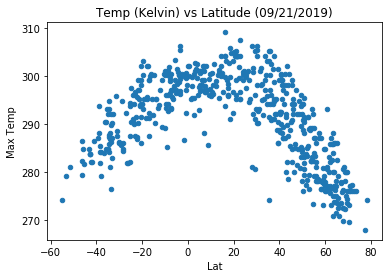

In [20]:
weather_df.plot(x = "Lat", y = "Max Temp", kind = "scatter", title = "Temp (Kelvin) vs Latitude (09/21/2019)")

#### Latitude vs. Humidity Plot

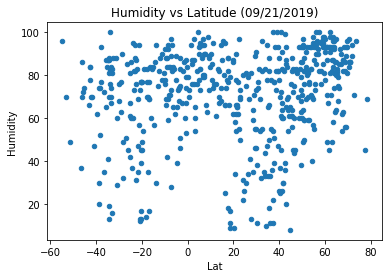

In [21]:
weather_df.plot(x = "Lat", y = "Humidity", kind = "scatter", title = "Humidity vs Latitude (09/21/2019)")

#### Latitude vs. Cloudiness Plot

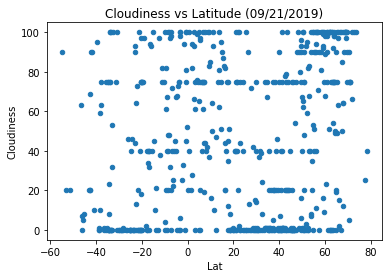

In [22]:
weather_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter", title = "Cloudiness vs Latitude (09/21/2019)")

#### Latitude vs. Wind Speed Plot

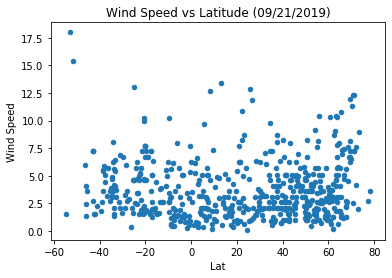

In [23]:
weather_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter", title = "Wind Speed vs Latitude (09/21/2019)")

In [26]:
print("OBSERVATIONS:")
print("----------------------")
print("1: The chart of Cloudiness to Latitude has these long bands of data points at 20% cloudy, 40% cloudy and 75% cloudy. It also has bands of data points along 0% and 100% which I think is totally forgivable because clear skies and overcast skies are phenomena that a person would expect, but these other bands seem like unequivocal proof that weathermen are liars. I would expect a continuous distribution of cloudiness levels throughout. These clusters of data points are artifacts of their dishonesty; monuments to their corner cutting and inability to do math as well as actual math majors.")
print("----------------------")
print("2: So apparently if you don't specify a unit, the temperature comes out in Kelvin. Kelvin is awesome because if a temperature in Kelvin is twice as large as another temperature in Kelvin, then you know that the first measurement has twice as much thermal energy. If global warming headlines used Kelvin, they could convey increases in temperature in such a way that a person could know how much more quickly they're being cooked by the environment. That seems impactful.")
print("2.5: The peak temperature occurs at a lattitude around 15 degrees north. From my vague reccolection of elementary school astronomy, (and my even vaguer recollection of undergraduate astronomy...) I would have expected this to occur closer to the equator. I wonder if it has something to do with how much heat the oceans can absorb. If I recall correctly, there's a lot more ocean in the southern hemisphere than the northern hemisphere.")
print("----------------------")
print("There is a band of lattitudes near the equator that don't have any humidities less than 60%. These seem like fabulous places to avoid. Then, around the 60 degrees north lattitude, there is another dense cluster of humid (>60%) locations. This defies all reasoning. I grew up in a town in Wisconsin that was near the 44th parallel and it was always slightly more humid than dry but not even close to muggy. Are there towns in Siberia and Canada that are as muggy as the equator? Frankly, I hope to never find out.")
      

OBSERVATIONS:
----------------------
1: The chart of Cloudiness to Latitude has these long bands of data points at 20% cloudy, 40% cloudy and 75% cloudy. It also has bands of data points along 0% and 100% which I think is totally forgivable because clear skies and overcast skies are phenomena that a person would expect, but these other bands seem like unequivocal proof that weathermen are liars. I would expect a continuous distribution of cloudiness levels throughout. These clusters of data points are artifacts of their dishonesty; monuments to their corner cutting and inability to do math as well as actual math majors.
----------------------
2: So apparently if you don't specify a unit, the temperature comes out in Kelvin. Kelvin is awesome because if a temperature in Kelvin is twice as large as another temperature in Kelvin, then you know that the first measurement has twice as much thermal energy. If global warming headlines used Kelvin, they could convey increases in temperature in